In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [2]:
from src.processing import *

# Teste 1: Leitor da Biblia


## Processamento

#### Imagem Original

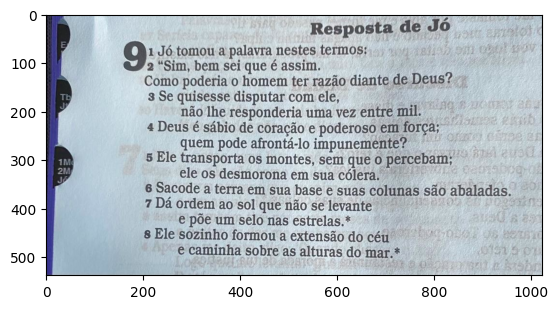

In [3]:
img = lerImagem("data\images\Biblia.jpg")
mostrar(img)

### Imagem pré processada

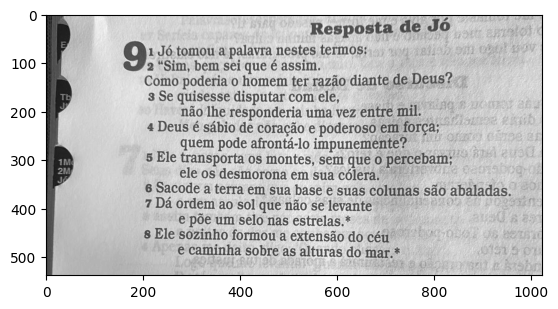

In [4]:
imgCinza = escalaCinza(img)
mostrar(imgCinza)

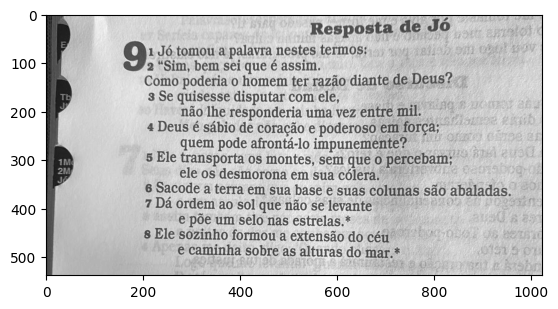

In [5]:

gauss = gaussiano(imgCinza, 1, 1)

mostrar(gauss)

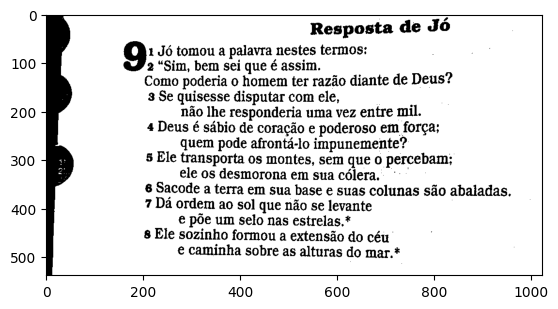

In [6]:
imgTrasholding = thresholding(gauss)
#thres = gaussian_thresholding(grey)

mostrar(imgTrasholding)

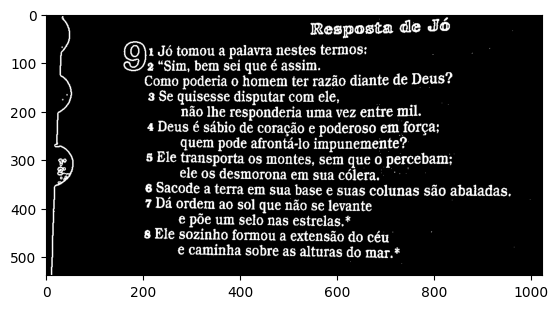

In [7]:
imgTrasholdingGauss = thresholdingGaussiano(imgTrasholding)
#thres = gaussian_thresholding(grey)

mostrar(imgTrasholdingGauss)

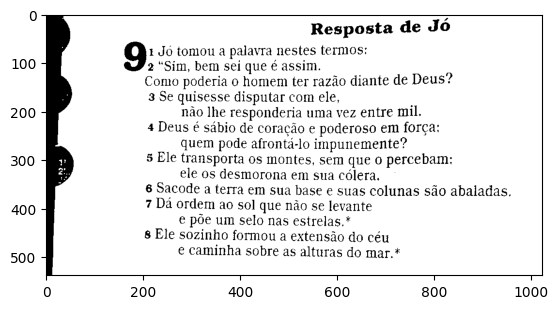

In [8]:
imgProcessada = imgTrasholding
imgProcessada = dilatarImg(imgProcessada, iterations=1)

mostrar(imgProcessada)

## Separar Caracteres

### Segmentação Processada

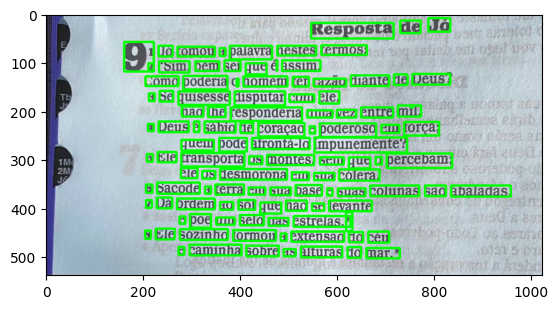

In [9]:
mostrar(palavraBlocoImg(imgProcessada.copy(), (0, 255, 0), img=img.copy()))

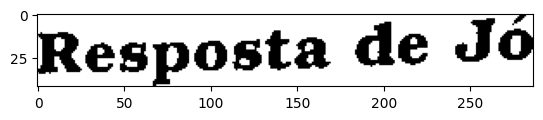

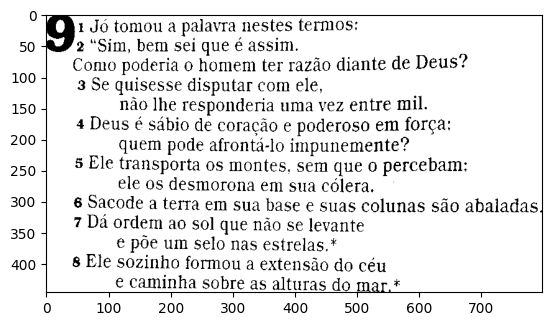

['Resposta de Jó\n', '91 Jó tomou a palavra nestes termos:\n2 “Sim, bem sei que é assim. —— "\nComo poderia o homem ter razão diante de Deus?\n3 Se quisesse disputar com ele, \'\nnão lhe responderia uma vez entre mil.\n4 Deus é sábio de coração e poderoso em força:\nquem pode afrontá-lo impunemente?\n5 Ele transporta os montes, sem que o percebam;\nele os desmorona em sua cólera.\n8 Sacode a terra em sua base e suas colunas são abaladas.\n7 Dá ordem ao sol que não se levante\n€ põe um selo nas estrelas, *\n8 Ele sozinho formou a extensão do céu\ne caminha sobre as alturas do mar *\n']


In [10]:
dadosImg= pegarDados(imgProcessada)
segmento = list()
segmentoTxt = list()

for i in range(len(dadosImg['text'])):
    (x, y, w, h) = (dadosImg['left'][i], dadosImg['top'][i], dadosImg['width'][i], dadosImg['height'][i])
    corteImg = imgProcessada[y:y+h, x:x+w]
    if dadosImg['level'][i] == 2:
        segmento.append(corteImg)
       
        #print(img_dict['text'][i])
        segmentoTemp= ocr(corteImg)
        i=0
        while segmentoTemp=='' and i<=10:
            corteImg=imgProcessada[y-i:y+h+i,x-i:x+w+i]
            
            segmentoTemp= ocr(corteImg)
            i=i+1
        mostrar(corteImg)
        segmentoTxt.append(segmentoTemp)
        # print(segment_txt)
print(segmentoTxt)
# segmentoTxt.pop()

### Segmentação Original

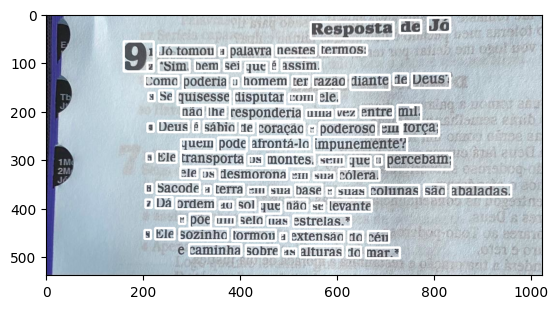

In [11]:
mostrar(palavraBlocoImg(img.copy(), (255,255,255)))

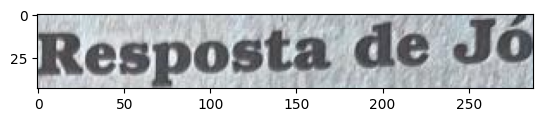

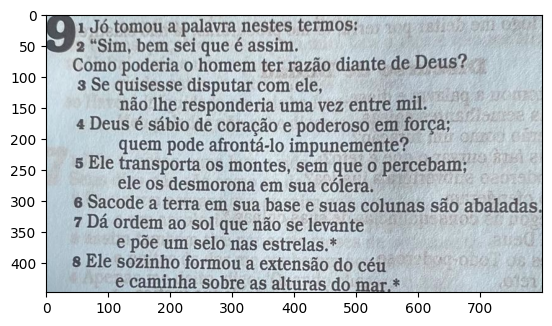

['Resposta de Jó\n', '91 Jó.tomou a palavra nestes termos:\n2 “Sim, bem sei que é assim. À á\nComo poderia o homem ter razão diante de Deus?\n3 Se quisesse disputar com ele, é\nnão lhe responderia uma vez entre mil.\n4 Deus é sábio de coração e poderoso em força;\nquem pode afrontá-lo impunemente? :\n5 Ele transporta os montes, sem que o percebam;\nele os desmorona em sua cólera. |\n6 Sacode a terra em sua base e suas colunas são abaladas.\n7 Dá ordem ao sol que não se levante\ne põe um selo nas estrelas.*\n8 Ele sozinho formou a extensão do céu\ne caminha sobre as alturas do mar *\n']


In [12]:
dadosImgOriginal= pegarDados(img)
segmentoOriginal = list()
segmentoTxtOriginal = list()

for i in range(len(dadosImgOriginal['text'])):
    (x, y, w, h) = (dadosImgOriginal['left'][i], dadosImgOriginal['top'][i], dadosImgOriginal['width'][i], dadosImgOriginal['height'][i])
    corteImg = img[y:y+h, x:x+w]
    if dadosImgOriginal['level'][i] == 2:
        segmentoOriginal.append(corteImg)
        mostrar(corteImg)
        #print(img_dict['text'][i])
        segmentoTemp= ocr(corteImg)
        segmentoTxtOriginal.append(segmentoTemp)
        # print(segment_txt)
print(segmentoTxtOriginal)

## OCR

In [13]:
textImgOriginal = ocr(img)
textImgProcessada = ocr(imgProcessada)
segmentoTxt = ' '.join(segmentoTxt)
segmentoTxtOriginal = ' '.join(segmentoTxtOriginal)



In [14]:
print(textImgOriginal)

Resposta de Jó

91 Jó.tomou a palavra nestes termos:
2 “Sim, bem sei que é assim. À á
Como poderia o homem ter razão diante de Deus?
3 Se quisesse disputar com ele, é
não lhe responderia uma vez entre mil.
4 Deus é sábio de coração e poderoso em força;
quem pode afrontá-lo impunemente? :
5 Ele transporta os montes, sem que o percebam;
ele os desmorona em sua cólera.
6 Sacode a terra em sua base e suas colunas são abaladas.
7 Dá ordem ao sol que não se levante
e põe um selo nas estrelas.*
8 Ele sozinho formou a extensão do céu
e caminha sobre as alturas do mar.*



In [15]:
print(textImgProcessada)

Resposta de Jó

91 Jó tomou a palavra nestes termos:
2 “Sim, bem sei que é assim. —— ,
Como poderia o homem ter razão diante de Deus?
3 Se quisesse disputar com ele, '
não lhe responderia uma vez entre mil.
4 Deus é sábio de coração e poderoso em força:
quem pode afrontá-lo impunemente?
5 Ele transporta os montes, sem que o percebam;
ele os desmorona em sua cólera.
8 Sacode a terra em sua base e suas colunas são abaladas.
7 Dá ordem ao sol que não se levante
€ põe um selo nas estrelas, *
8 Ele sozinho formou a extensão do céu
e caminha sobre as alturas do mar.*



In [16]:
print(segmentoTxt)

Resposta de Jó
 91 Jó tomou a palavra nestes termos:
2 “Sim, bem sei que é assim. —— "
Como poderia o homem ter razão diante de Deus?
3 Se quisesse disputar com ele, '
não lhe responderia uma vez entre mil.
4 Deus é sábio de coração e poderoso em força:
quem pode afrontá-lo impunemente?
5 Ele transporta os montes, sem que o percebam;
ele os desmorona em sua cólera.
8 Sacode a terra em sua base e suas colunas são abaladas.
7 Dá ordem ao sol que não se levante
€ põe um selo nas estrelas, *
8 Ele sozinho formou a extensão do céu
e caminha sobre as alturas do mar *



In [17]:
print(segmentoTxtOriginal)

Resposta de Jó
 91 Jó.tomou a palavra nestes termos:
2 “Sim, bem sei que é assim. À á
Como poderia o homem ter razão diante de Deus?
3 Se quisesse disputar com ele, é
não lhe responderia uma vez entre mil.
4 Deus é sábio de coração e poderoso em força;
quem pode afrontá-lo impunemente? :
5 Ele transporta os montes, sem que o percebam;
ele os desmorona em sua cólera. |
6 Sacode a terra em sua base e suas colunas são abaladas.
7 Dá ordem ao sol que não se levante
e põe um selo nas estrelas.*
8 Ele sozinho formou a extensão do céu
e caminha sobre as alturas do mar *



## Pos-Processamento

### Texto imagem Original


In [18]:
textOriginalPos = removerEspaçoDuplo(textImgOriginal)
textOriginalPos=removerNumeros(textOriginalPos)
textOriginalPos = removerLetraSolo(textOriginalPos, keep_e=True, keep_a=True)
print(textOriginalPos)

Resposta de Jó  Jó.tomou a palavra nestes termos:  “Sim, bem sei que é assim. À  Como poderia  homem ter razão diante de Deus?  Se quisesse disputar com ele, é não lhe responderia uma vez entre mil.  Deus é sábio de coração e poderoso em força; quem pode afrontá-lo impunemente? :  Ele transporta os montes, sem que  percebam; ele os desmorona em sua cólera.  Sacode a terra em sua base e suas colunas são abaladas.  Dá ordem ao sol que não se levante e põe um selo nas estrelas.*  Ele sozinho formou a extensão do céu e caminha sobre as alturas do mar.* 


### Texto da imagem Original Segmentada

In [19]:
segmentoTxtOriginalPos = removerQuebra(segmentoTxtOriginal, add_space=True)
segmentoTxtOriginalPos = removerNumeros(segmentoTxtOriginalPos)
segmentoTxtOriginalPos = removerEspaçoDuplo(segmentoTxtOriginalPos)
segmentoTxtOriginalPos = removerLetraSolo(segmentoTxtOriginalPos)
print(segmentoTxtOriginalPos)

Resposta de Jó Jó.tomou palavra nestes termos: “Sim, bem sei que assim. Como poderia homem ter razão diante de Deus? Se quisesse disputar com ele, não lhe responderia uma vez entre mil. Deus sábio de coração poderoso em força; quem pode afrontá-lo impunemente? : Ele transporta os montes, sem que percebam; ele os desmorona em sua cólera. | Sacode terra em sua base suas colunas são abaladas. Dá ordem ao sol que não se levante põe um selo nas estrelas.* Ele sozinho formou extensão do céu caminha sobre as alturas do mar * 


### Texto da Imgem Processada


In [20]:
textImgProcessadaPos = removerEspaçoDuplo(' '.join(removerCaracEspecial(textImgProcessada, keep_dot_comma=True)))
textImgProcessadaPos=removerNumeros(textImgProcessadaPos)
textImgProcessadaPos = removerLetraSolo(textImgProcessadaPos, keep_e=True, keep_a=True, keep_o=True)
print(textImgProcessadaPos)

Resposta de Jó  Jó tomou a palavra nestes termos  Sim, bem sei que é assim. , Como poderia o homem ter razão diante de Deus  Se quisesse disputar com ele, não lhe responderia uma vez entre mil.  Deus é sábio de coração e poderoso em força quem pode afrontálo impunemente  Ele transporta os montes, sem que o percebam ele os desmorona em sua cólera.  Sacode a terra em sua base e suas colunas são abaladas.  Dá ordem ao sol que não se levante põe um selo nas estrelas,  Ele sozinho formou a extensão do céu e caminha sobre as alturas do mar. 


### Texto da imagem Processada e Segmentada

In [21]:
segmentoTxtPos = removerEspaçoDuplo(segmentoTxt)
segmentoTxtPos = removerNumeros(segmentoTxtPos)
segmentoTxtPos = removerLetraSolo(segmentoTxtPos)
print(segmentoTxtPos)

Resposta de Jó  Jó tomou palavra nestes termos:  “Sim, bem sei que assim. —— " Como poderia homem ter razão diante de Deus?  Se quisesse disputar com ele, ' não lhe responderia uma vez entre mil.  Deus sábio de coração poderoso em força: quem pode afrontá-lo impunemente?  Ele transporta os montes, sem que percebam; ele os desmorona em sua cólera.  Sacode terra em sua base suas colunas são abaladas.  Dá ordem ao sol que não se levante € põe um selo nas estrelas, *  Ele sozinho formou extensão do céu caminha sobre as alturas do mar * 
